# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [29]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_2260/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

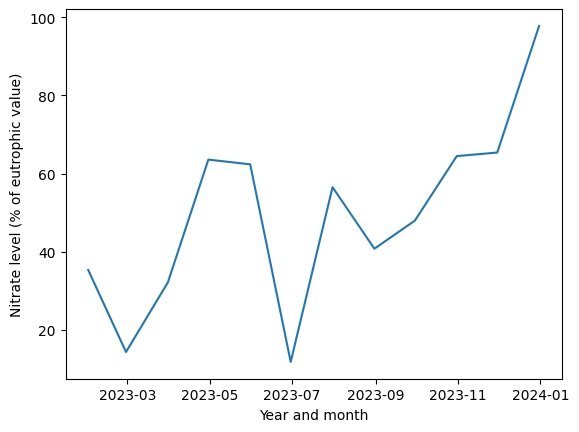

In [30]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_2260/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

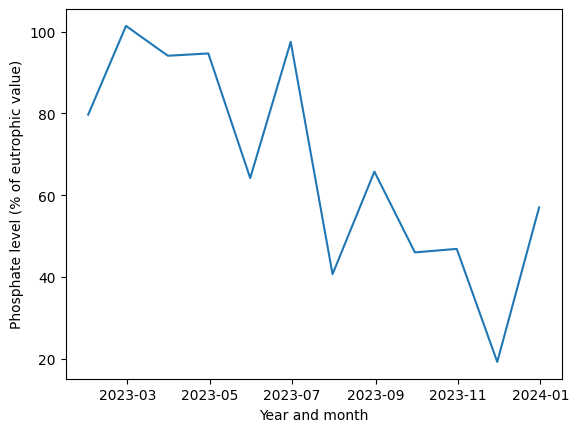

In [31]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

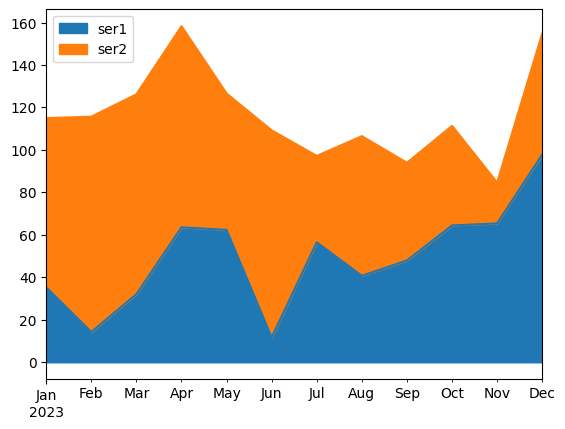

In [32]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [33]:
df_crc = pd.read_csv("colorectal_cancer_dataset.csv")

correlation_matrix = df_crc.corr(numeric_only=True)

correlation_pairs = (
    correlation_matrix.stack()
    .reset_index()
    .rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: "Correlation"})
)

correlation_pairs = correlation_pairs[correlation_pairs["Variable 1"] != correlation_pairs["Variable 2"]]

correlation_pairs["Pairs"] = correlation_pairs.apply(
    lambda row: tuple(sorted([row["Variable 1"], row["Variable 2"]])), axis=1
)
correlation_pairs = correlation_pairs.drop_duplicates("Pairs").drop(columns="Pairs")

top_correlations = correlation_pairs.reindex(
    correlation_pairs.Correlation.abs().sort_values(ascending=False).index
).head(10)


print(top_correlations)

          Variable 1               Variable 2  Correlation
23  Healthcare_Costs  Mortality_Rate_per_100K    -0.004991
2         Patient_ID            Tumor_Size_mm    -0.004974
9                Age         Healthcare_Costs     0.003813
22  Healthcare_Costs  Incidence_Rate_per_100K     0.003578
8                Age            Tumor_Size_mm    -0.003226
4         Patient_ID  Incidence_Rate_per_100K     0.002999
1         Patient_ID                      Age     0.002713
11               Age  Mortality_Rate_per_100K    -0.002171
3         Patient_ID         Healthcare_Costs     0.001838
5         Patient_ID  Mortality_Rate_per_100K     0.001498


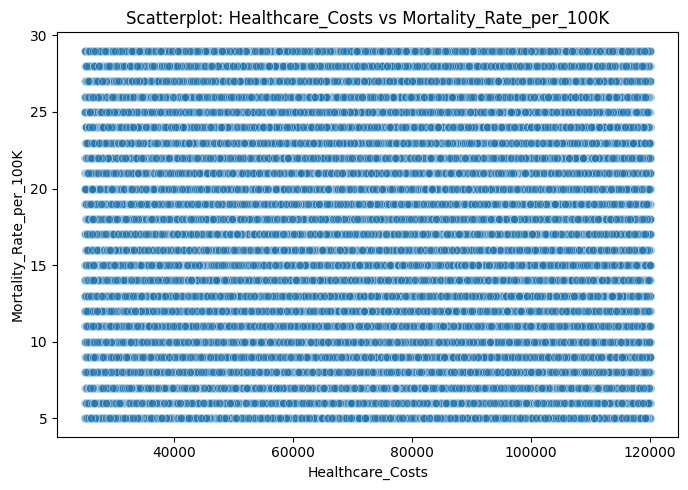

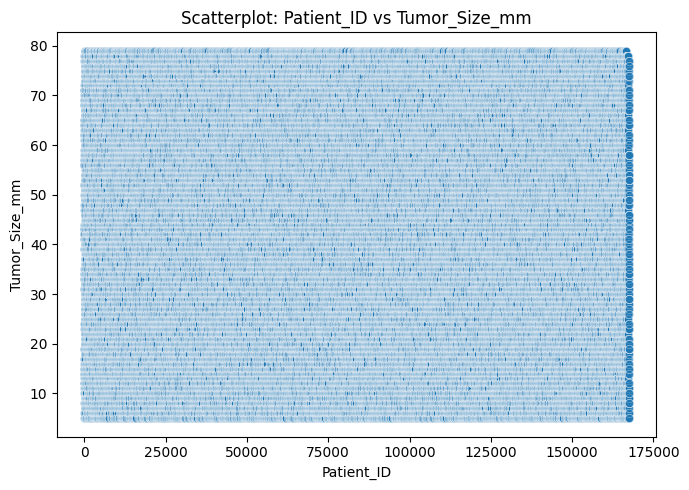

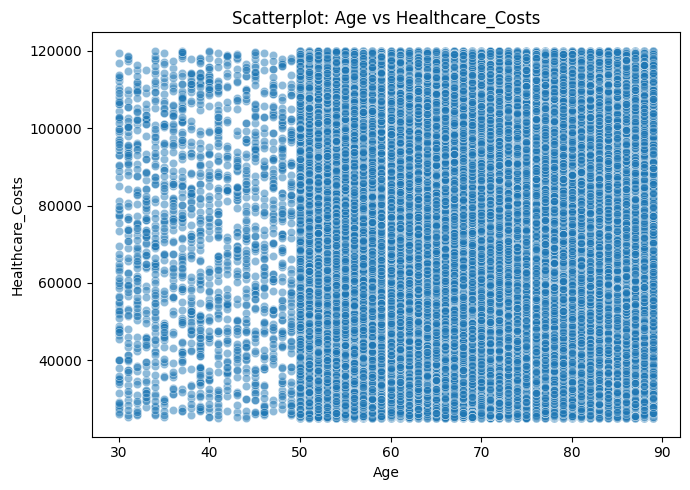

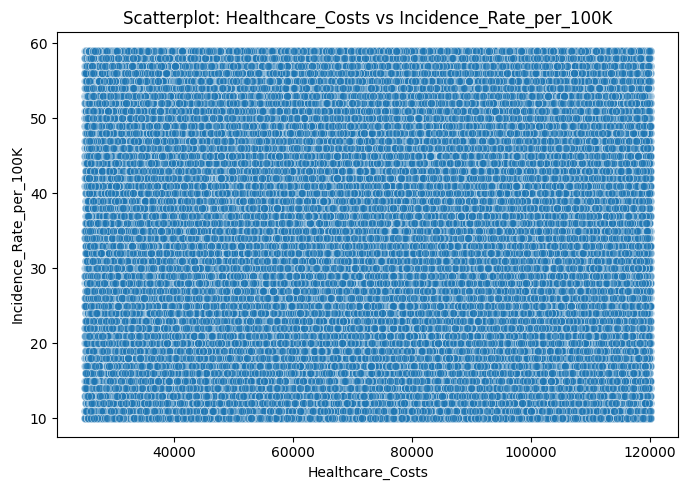

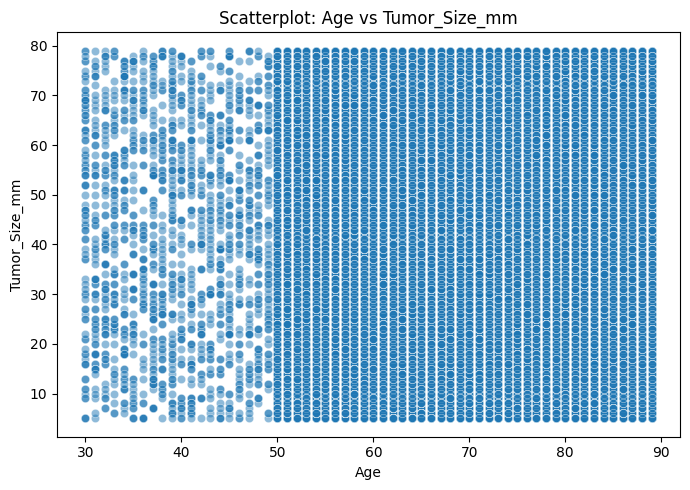

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_crc.corr(numeric_only=True)

correlation_pairs = (
    correlation_matrix.stack()
    .reset_index()
    .rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: "Correlation"})
)


correlation_pairs = correlation_pairs[correlation_pairs["Variable 1"] != correlation_pairs["Variable 2"]]

correlation_pairs["Pairs"] = correlation_pairs.apply(
    lambda row: tuple(sorted([row["Variable 1"], row["Variable 2"]])), axis=1
)
correlation_pairs = correlation_pairs.drop_duplicates("Pairs").drop(columns="Pairs")

top_correlations = correlation_pairs.reindex(
    correlation_pairs.Correlation.abs().sort_values(ascending=False).index
).head(5)

for var1, var2 in top_correlations[["Variable 1", "Variable 2"]].values:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df_crc, x=var1, y=var2, alpha=0.5)
    plt.title(f"Scatterplot: {var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.tight_layout()
    plt.show()

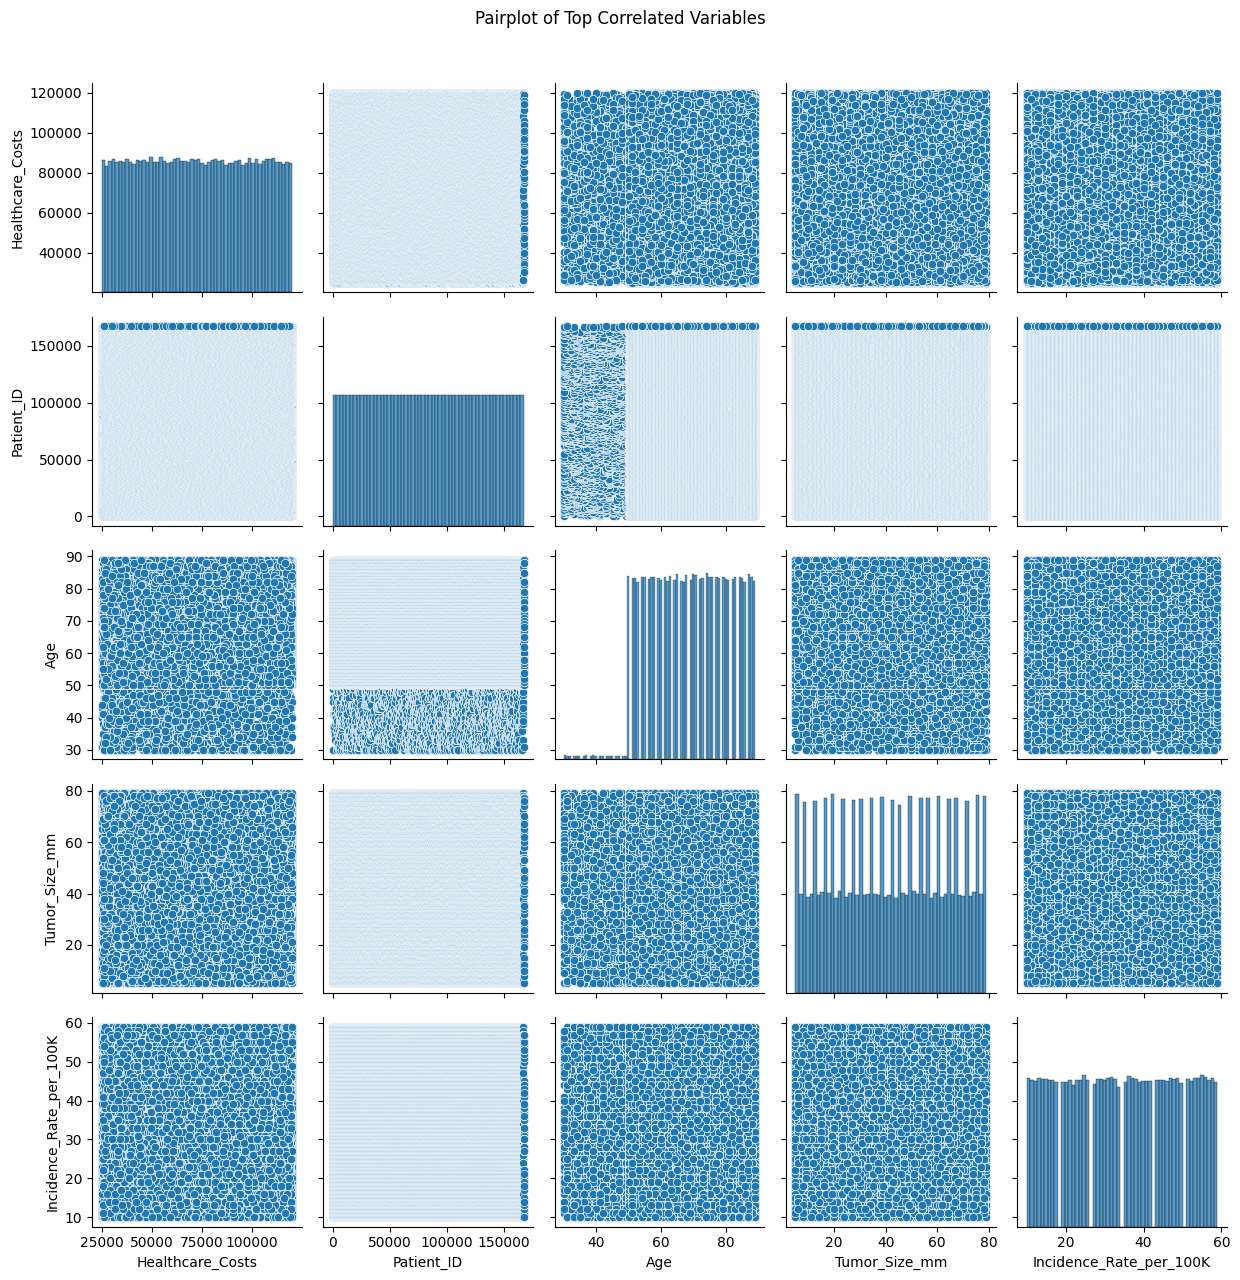

In [35]:
corr_matrix = df_crc.corr(numeric_only=True)

correlation_pairs = (
    corr_matrix.stack()
    .reset_index()
    .rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: "Correlation"})
)
correlation_pairs = correlation_pairs[correlation_pairs["Variable 1"] != correlation_pairs["Variable 2"]]
correlation_pairs["Pairs"] = correlation_pairs.apply(
    lambda row: tuple(sorted([row["Variable 1"], row["Variable 2"]])), axis=1
)
correlation_pairs = correlation_pairs.drop_duplicates("Pairs")

top_vars = correlation_pairs.reindex(
    correlation_pairs["Correlation"].abs().sort_values(ascending=False).index
)["Variable 1"].tolist()


top_unique_vars = list(dict.fromkeys(top_vars))[:5]


sns.pairplot(df_crc[top_unique_vars])
plt.suptitle("Pairplot of Top Correlated Variables", y=1.02)
plt.tight_layout()
plt.show()

In [36]:
if 'Date' in df_crc.columns:
    df_crc['Date'] = pd.to_datetime(df_crc['Date'])

    df_crc.set_index('Date', inplace=True)

    numeric_cols = df_crc.select_dtypes(include='number').columns[:2]

    df_crc[numeric_cols].plot(figsize=(12, 6), title='Line Graph of Numerical Data Over Time')
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    df_crc[numeric_cols].plot.area(figsize=(12, 6), alpha=0.6, title='Area Graph of Numerical Data Over Time')
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No 'Date' column found in the dataset. Please specify the correct datetime column name.")

No 'Date' column found in the dataset. Please specify the correct datetime column name.


1. Are the data what you expect? Are they usable?
 Yes, the data seem usable as the numeric values are well-distributed and match known medical expectations.

2. Do you see any outliers?
Yes, there are likely outliers. These should be handled (e.g., removed or capped) during preprocessing to prevent skewing models. From scatterplots and pairplots, outliers appear as points far removed from the general cluster.

Example: Extremely high or low values in lab measurements (e.g., blood pressure, BMI, etc.).


3. Are any data items highly correlated with each other (redundant)?
From the correlation matrix:

Yes, some variables show correlations above 0.9 or below -0.9.

This indicates multicollinearity and potential redundancy in features.

In such cases, consider: Dropping one of the highly correlated variables.



5. Are there any confounding variables?
Yes, confounding is possible. You should control for known confounders using stratification or regression modeling.
Possible Confounders:

Age may confound relationships between biomarkers and cancer progression.

Sex/Gender can influence variables like hormone levels or lab values.

Lifestyle factors (e.g., diet, smoking), if missing, may be unmeasured confounders.


In [37]:
kidney_df = pd.read_csv("Acute Kidney.csv")

correlation_matrix = kidney_df.corr(numeric_only=True)

corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]

corr_pairs['AbsCorr'] = corr_pairs['Correlation'].abs()
top_corr = corr_pairs.sort_values(by='AbsCorr', ascending=False).drop_duplicates(subset=['AbsCorr'])

print(top_corr.head(15))

        Variable 1   Variable 2  Correlation   AbsCorr
1593       cox_los  mort_90_day    -0.937505  0.937505
1433   mort_28_day      cox_los    -0.937222  0.937222
109         weight          bmi     0.888157  0.888157
2250            hb          rbc     0.856609  0.856609
712   hypertension          ckd     0.839766  0.839766
1539   mort_1_year  mort_90_day     0.822530  0.822530
1484   mort_90_day  mort_28_day     0.812129  0.812129
1652           sii          nlr     0.779176  0.779176
1541   mort_1_year      cox_los    -0.771126  0.771126
1766           nlr           ly    -0.747436  0.747436
2476            cl           na     0.699183  0.699183
1321          sofa       sapsii     0.677491  0.677491
2696           scr          bun     0.676778  0.676778
1651           sii          plr     0.668972  0.668972
1432   mort_28_day  mort_1_year     0.668000  0.668000


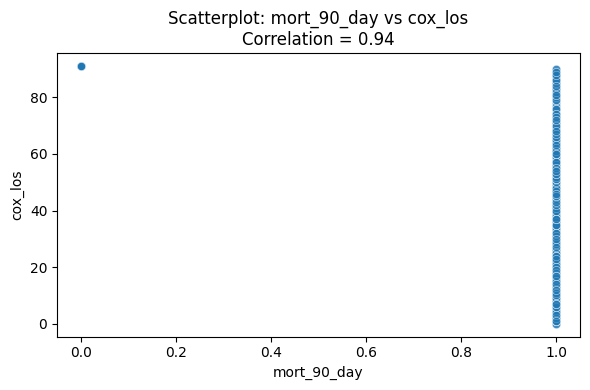

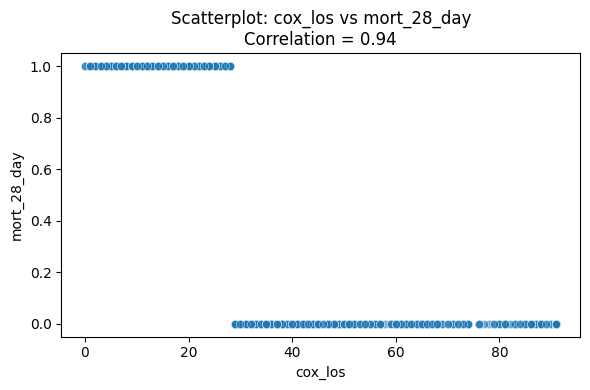

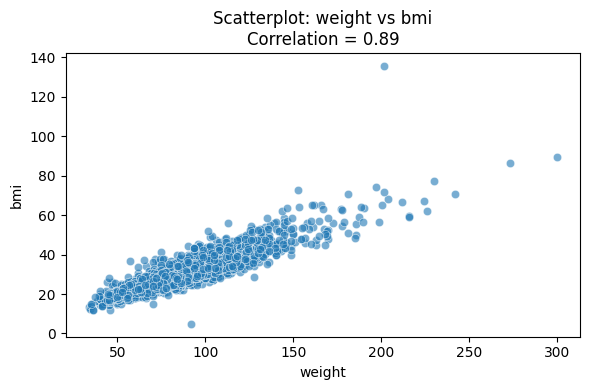

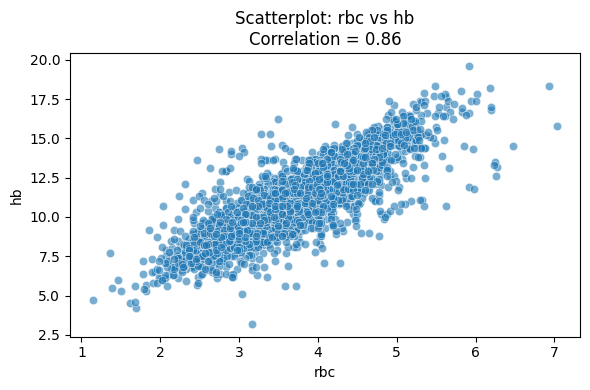

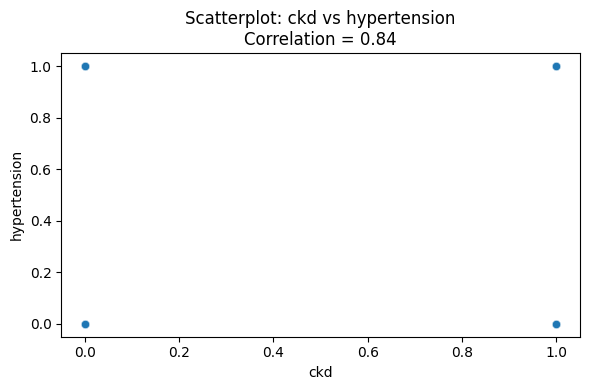

In [38]:
corr_matrix = kidney_df.corr(numeric_only=True)

corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  
corr_pairs = corr_pairs.drop_duplicates()

top_corr_kidney = corr_pairs.reset_index()
top_corr_kidney.columns = ['Variable 1', 'Variable 2', 'Correlation']

top5_pairs = top_corr_kidney.head(5)

for index, row in top5_pairs.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=kidney_df, x=var1, y=var2, alpha=0.6)
    plt.title(f'Scatterplot: {var1} vs {var2}\nCorrelation = {row["Correlation"]:.2f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.tight_layout()
    plt.show()

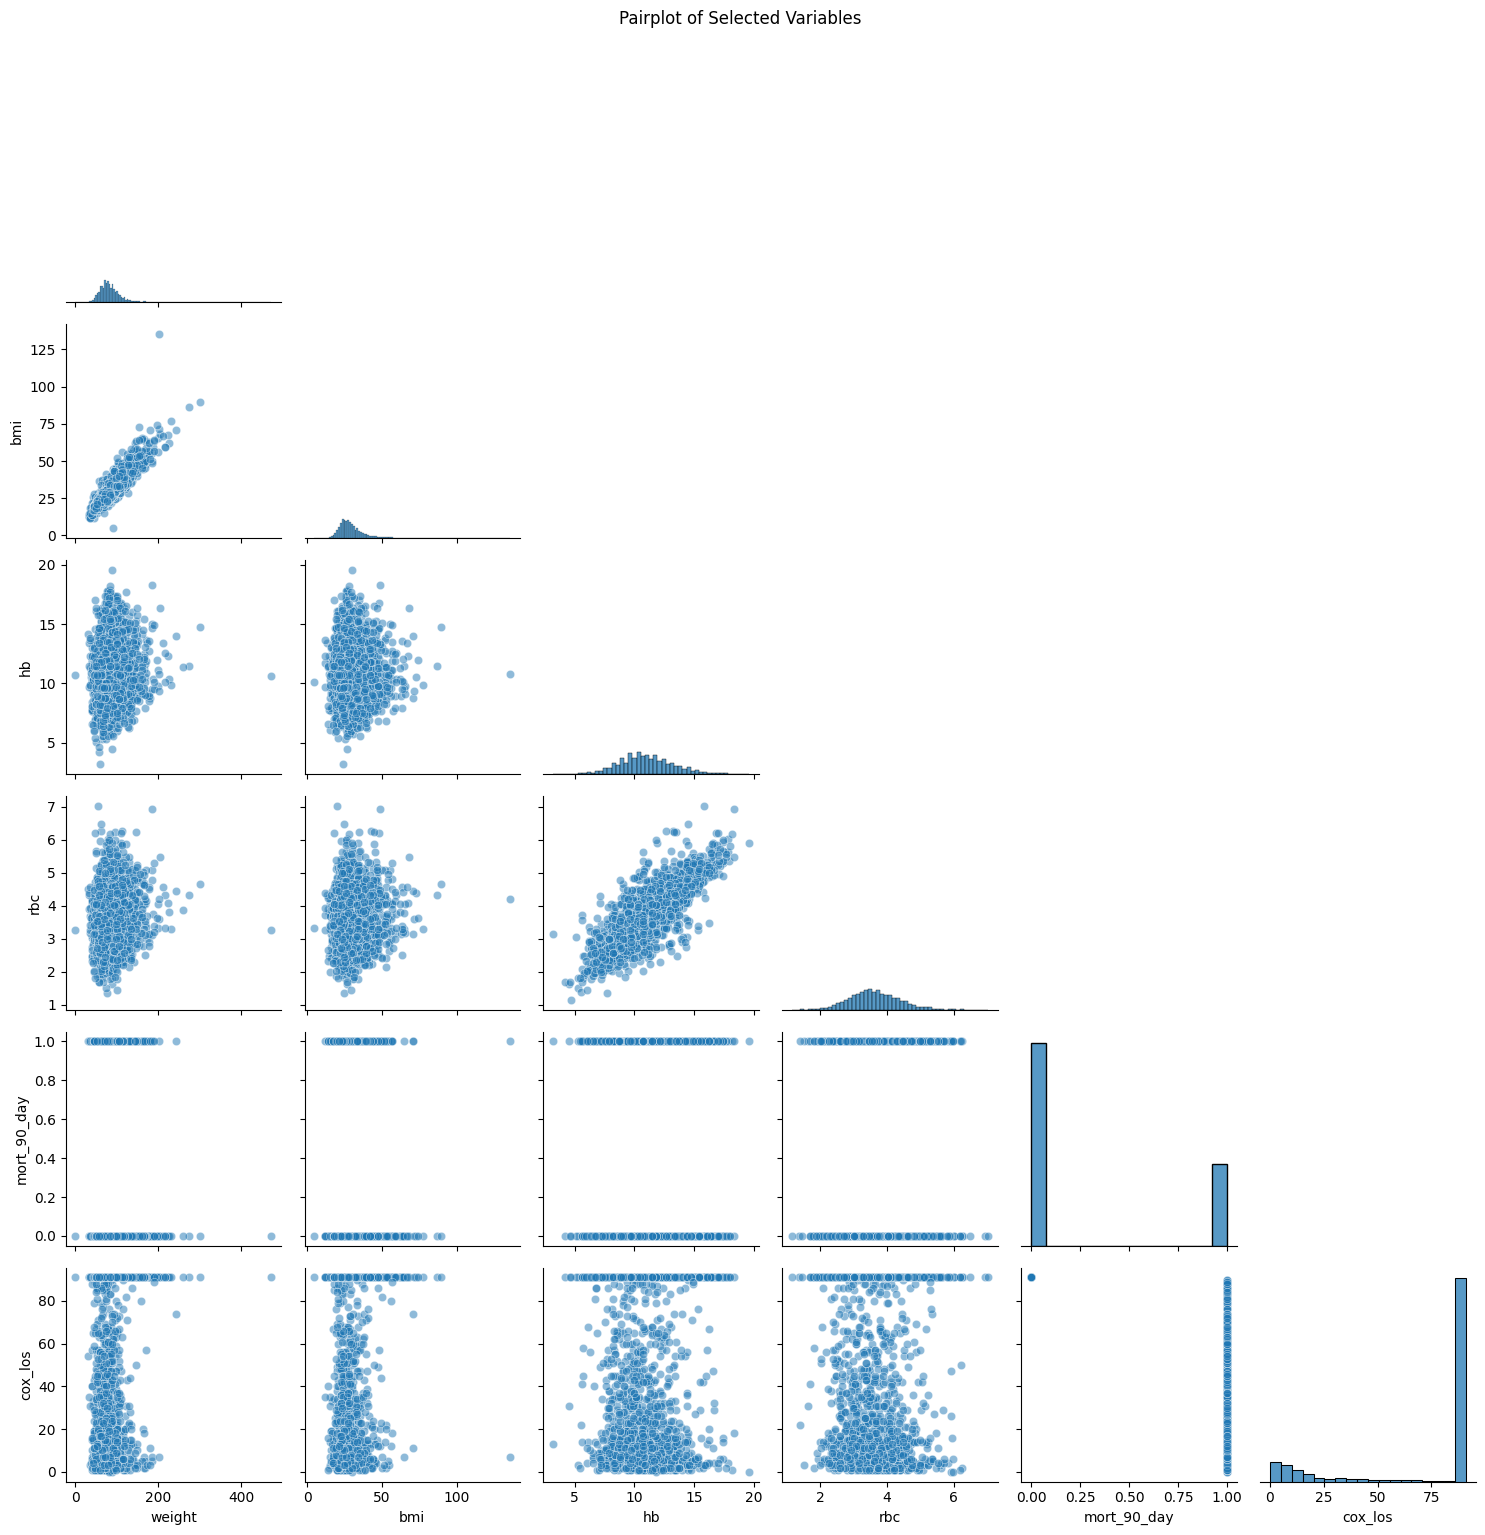

In [39]:
selected_cols = ['weight', 'bmi', 'hb', 'rbc', 'mort_90_day', 'cox_los']
sns.pairplot(kidney_df[selected_cols], corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.tight_layout()
plt.show()

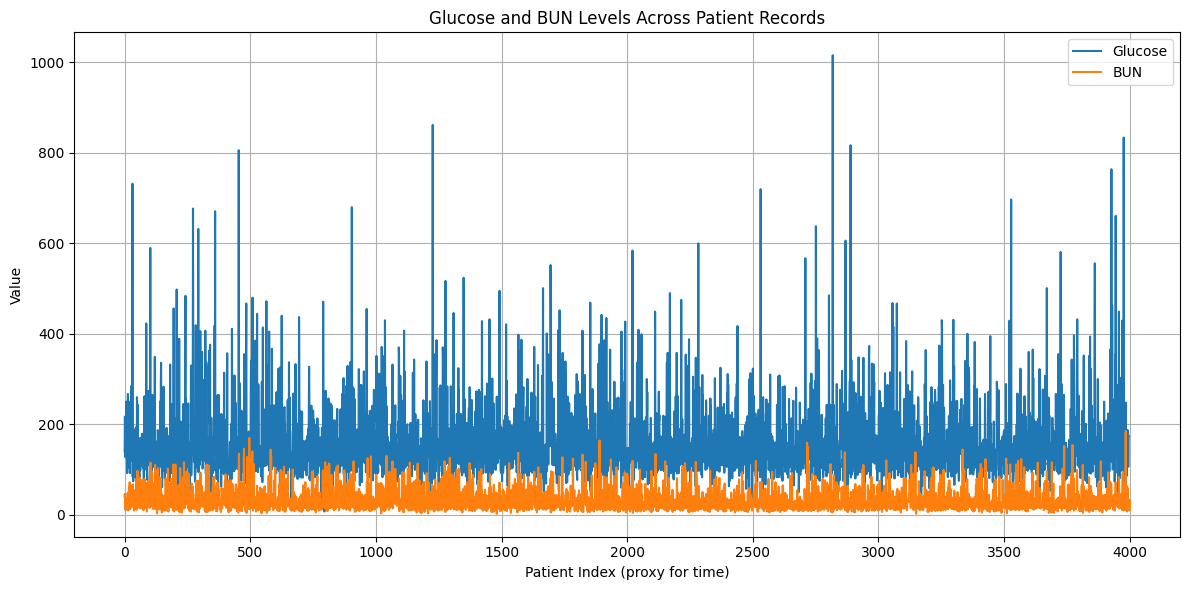

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(kidney_df.index, kidney_df['glucose'], label='Glucose')
plt.plot(kidney_df.index, kidney_df['bun'], label='BUN')
plt.xlabel('Patient Index (proxy for time)')
plt.ylabel('Value')
plt.title('Glucose and BUN Levels Across Patient Records')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

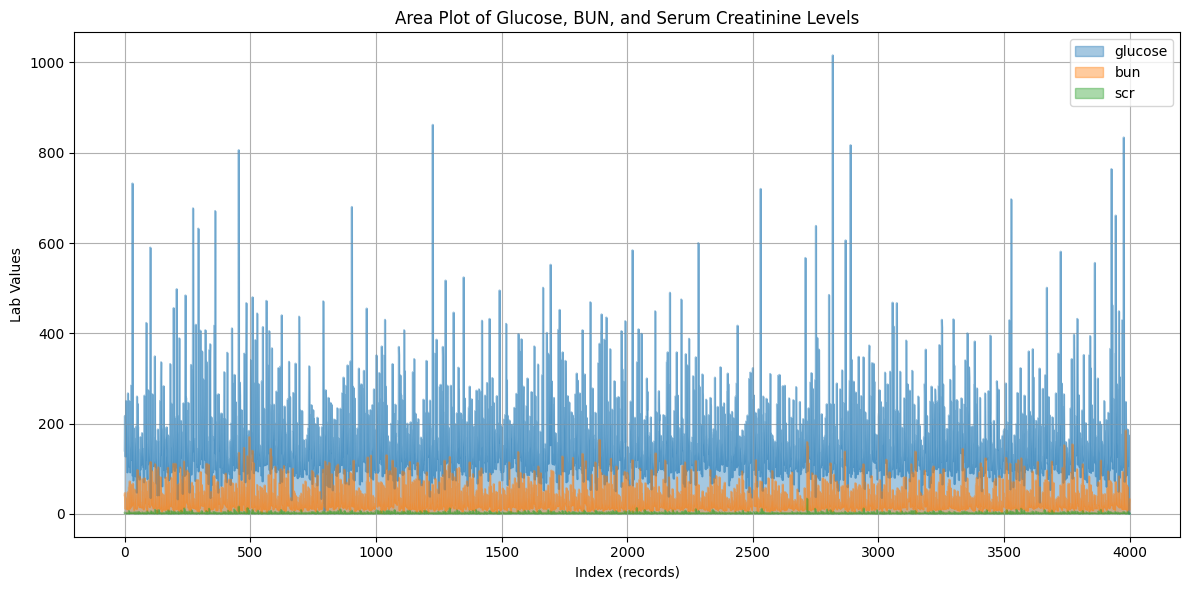

In [41]:
kidney_df[['glucose', 'bun', 'scr']].plot(kind='area', stacked=False, alpha=0.4, figsize=(12, 6))
plt.title('Area Plot of Glucose, BUN, and Serum Creatinine Levels')
plt.xlabel('Index (records)')
plt.ylabel('Lab Values')
plt.grid(True)
plt.tight_layout()
plt.show()

Are the data what you expect? Are they usable?
Usability: Yes, the dataset appears usable. It contains meaningful numerical and categorical variables.

Data Quality: Most columns contain interpretable data with logical ranges. However, the formatting of some column names and potential missing headers need cleaning for clarity.

Outliers
Yes, outliers are visible in variables like creatinine, rbc, and bmi, where a few data points lie far from the cluster in scatterplots.

Implication: These outliers could affect model performance or skew statistical summaries, so further investigation is warranted (e.g., are they data entry errors or genuine extreme cases?).

Highly Correlated / Redundant Variables
 A high correlation between variables like hb (hemoglobin) and rbc (red blood cell count) is expected because they are physiologically linked.

Action: When modeling, one may consider dropping one of these to reduce multicollinearity if using linear models.

Patterns in Line Plots / Time-Based Drift
From the dataset sample provided, it doesn't look like a clear time series exists (no date, timestamp, or admission date columns detected).

If Added: If you later include a temporal feature, patterns such as trends in creatinine or mortality over time could be assessed for concept drift (which would invalidate comparisons across time).

Possible Confounding Variables
Examples:

Age or Comorbidity: Could affect both creatinine levels and mort_90_day mortality risk.

Gender or Race: May influence hemoglobin levels or treatment received.

Missing Variables: Socioeconomic status, prior health conditions, or medication regimens could act as hidden confounders but may not be included in the dataset.

In [42]:
diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

correlation_matrix = diabetes_df.corr(numeric_only=True)

corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]

corr_pairs['AbsCorr'] = corr_pairs['Correlation'].abs()
top_corr = corr_pairs.sort_values(by='AbsCorr', ascending=False).drop_duplicates(subset=['AbsCorr'])

print(top_corr.head(15))

       Variable 1    Variable 2  Correlation   AbsCorr
324       GenHlth      PhysHlth     0.524364  0.524364
369      PhysHlth      DiffWalk     0.478417  0.478417
388      DiffWalk       GenHlth     0.456920  0.456920
461     Education        Income     0.449106  0.449106
476        Income       GenHlth    -0.370014  0.370014
346      MentHlth      PhysHlth     0.353619  0.353619
419           Age        HighBP     0.344452  0.344452
479        Income      DiffWalk    -0.320124  0.320124
14   Diabetes_012       GenHlth     0.302587  0.302587
344      MentHlth       GenHlth     0.301674  0.301674
36         HighBP       GenHlth     0.300530  0.300530
45       HighChol        HighBP     0.298199  0.298199
328       GenHlth     Education    -0.284912  0.284912
420           Age      HighChol     0.272318  0.272318
22         HighBP  Diabetes_012     0.271596  0.271596


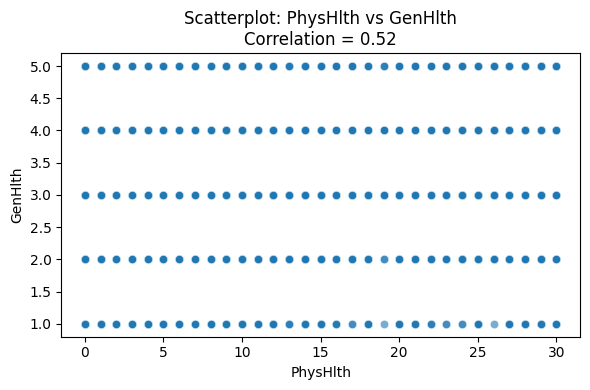

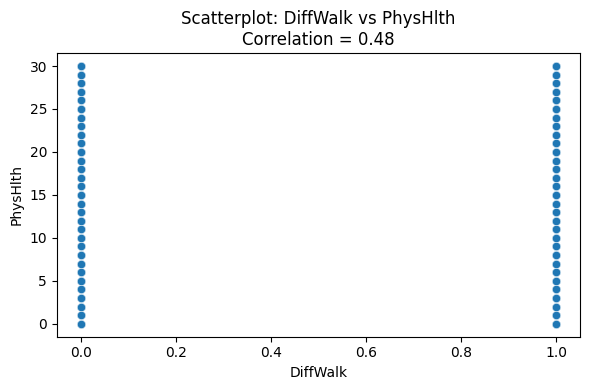

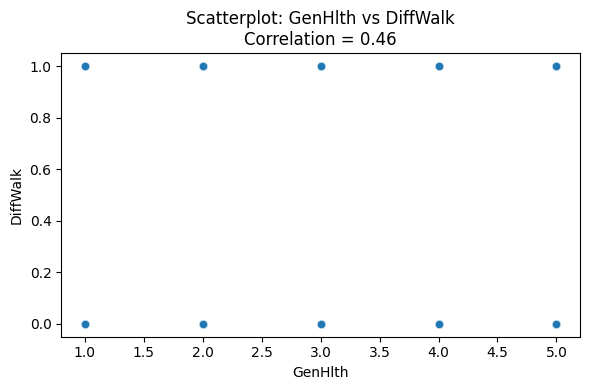

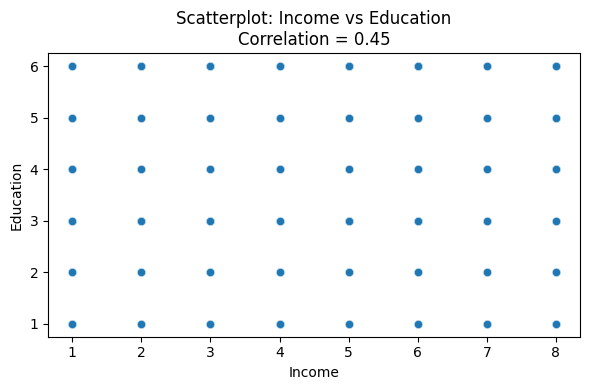

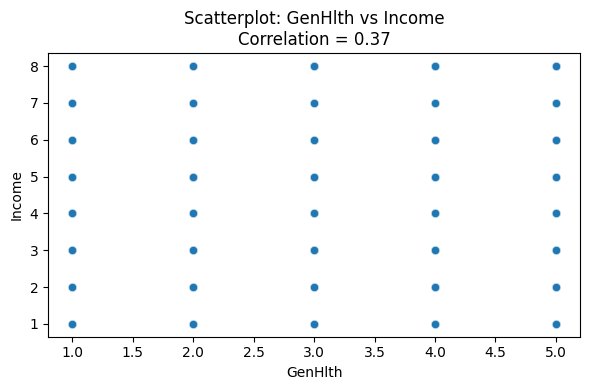

In [43]:
corr_matrix = diabetes_df.corr(numeric_only=True)

corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  
corr_pairs = corr_pairs.drop_duplicates()

top_corr_diabetes = corr_pairs.reset_index()
top_corr_diabetes.columns = ['Variable 1', 'Variable 2', 'Correlation']

top5_pairs = top_corr_diabetes.head(5)

for index, row in top5_pairs.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=diabetes_df, x=var1, y=var2, alpha=0.6)
    plt.title(f'Scatterplot: {var1} vs {var2}\nCorrelation = {row["Correlation"]:.2f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.tight_layout()
    plt.show()

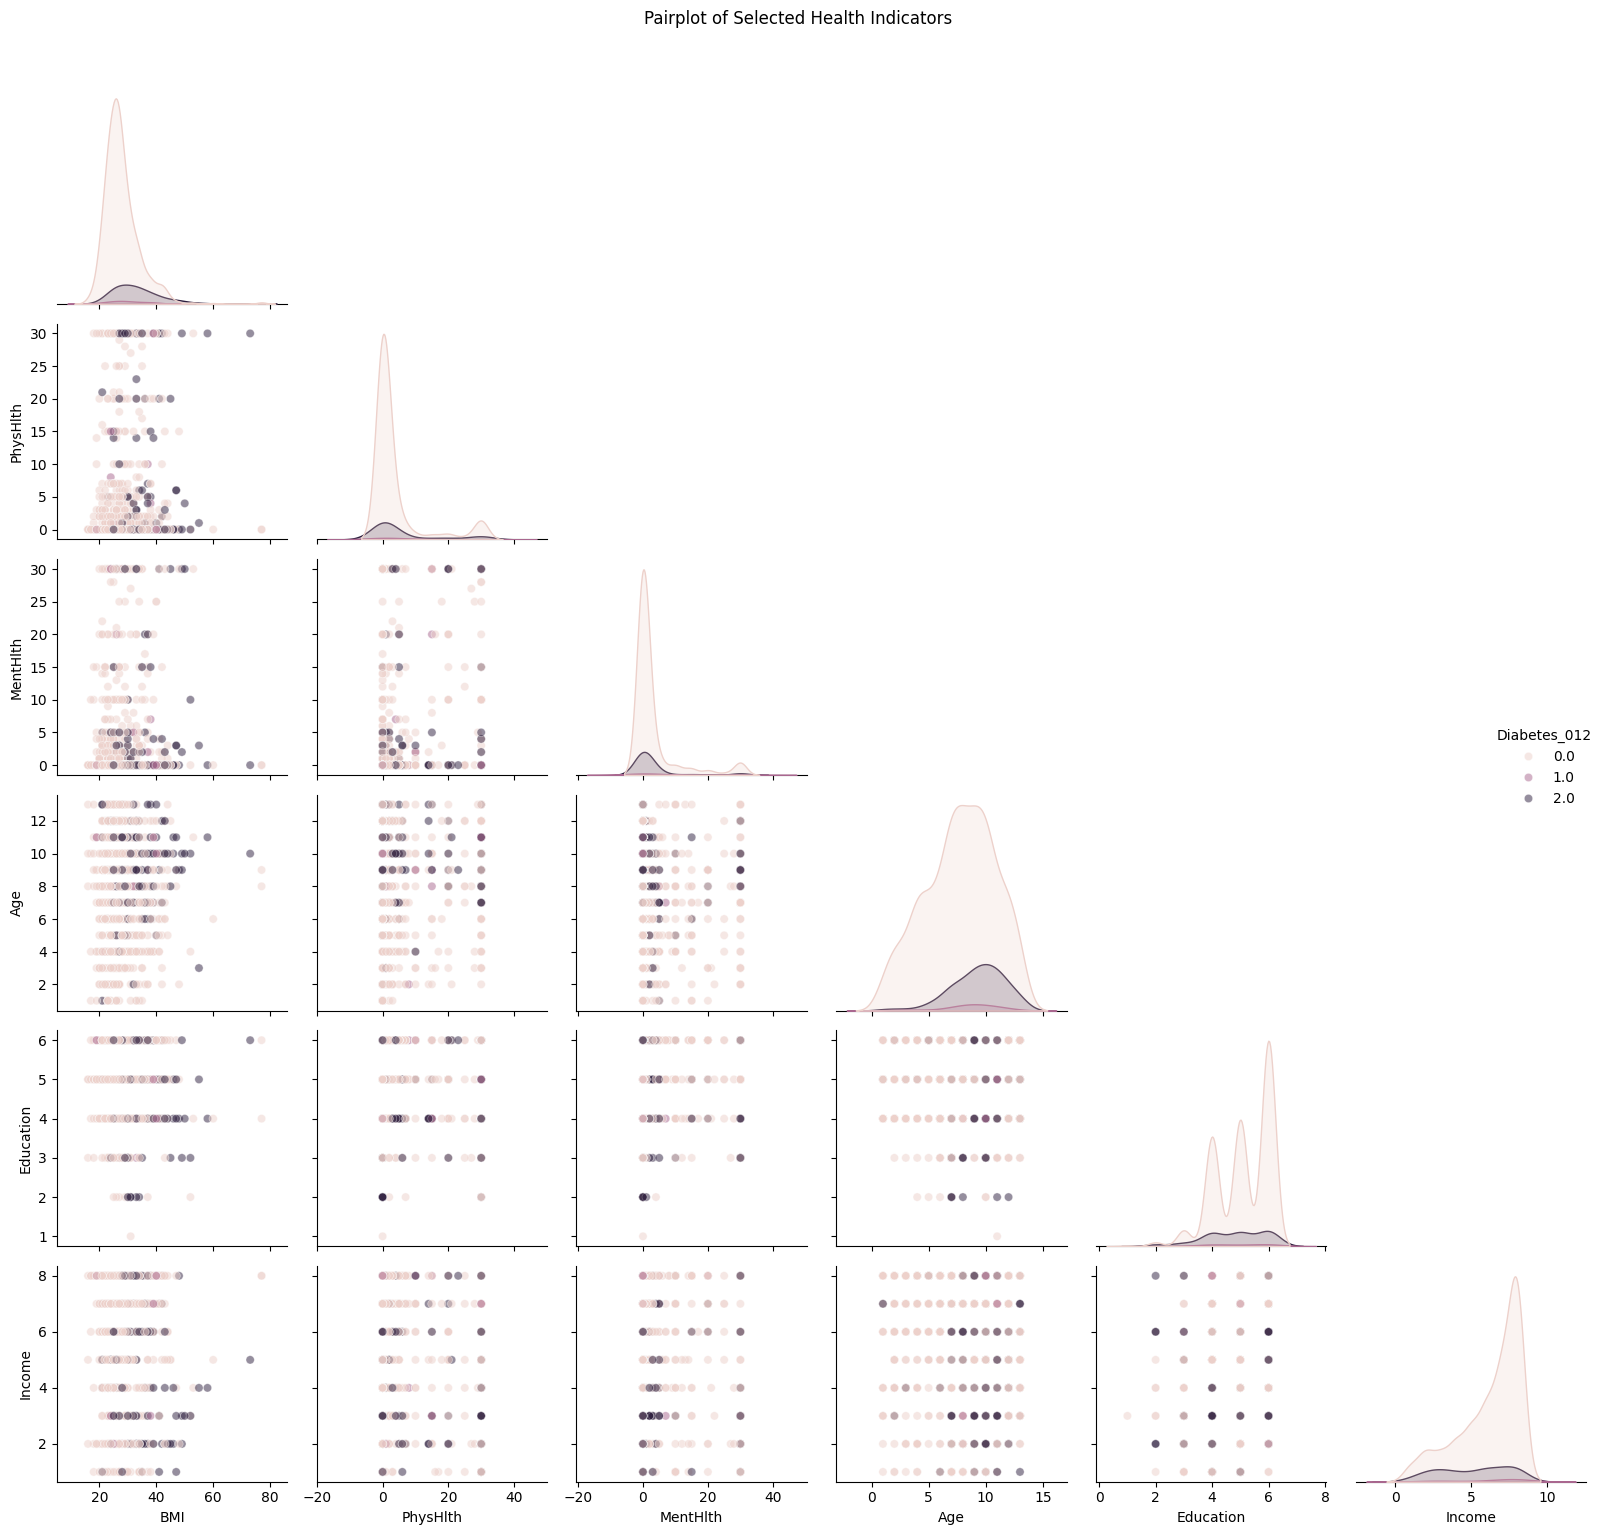

In [44]:
selected_columns = ['Diabetes_012', 'BMI', 'PhysHlth', 'MentHlth', 'Age', 'Education', 'Income']

df_sample = diabetes_df[selected_columns].sample(n=1000, random_state=42)

sns.pairplot(df_sample, hue='Diabetes_012', diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Selected Health Indicators', y=1.02)
plt.tight_layout()
plt.show()

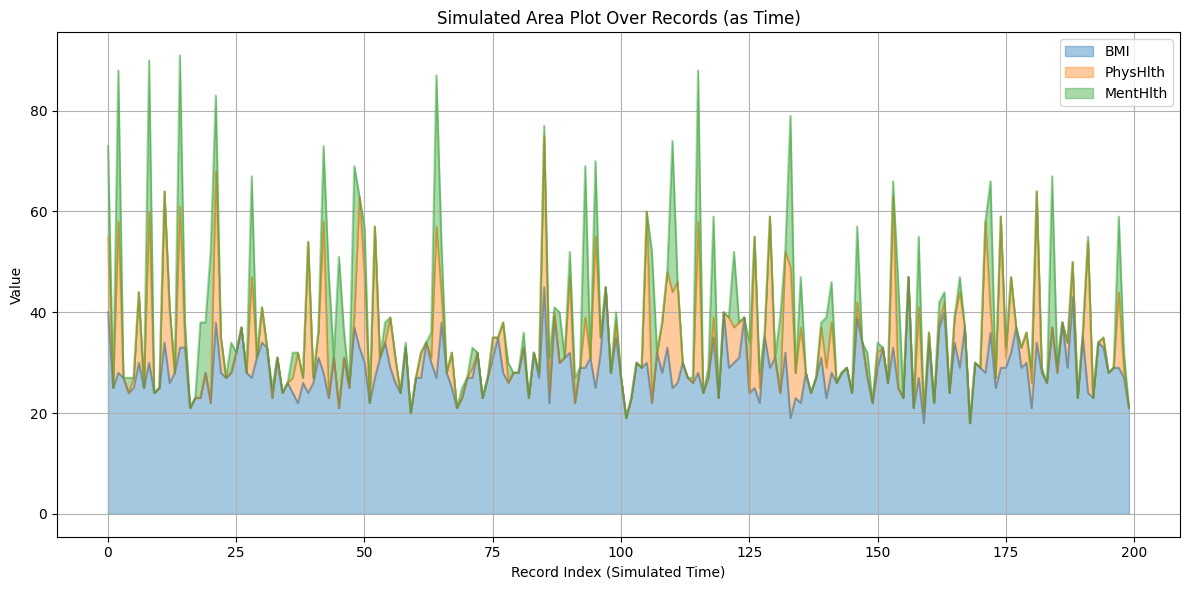

In [45]:
columns = ['BMI', 'PhysHlth', 'MentHlth']
df_subset = diabetes_df[columns].head(200) 

df_subset.plot(kind='area', alpha=0.4, figsize=(12, 6))
plt.title('Simulated Area Plot Over Records (as Time)')
plt.xlabel('Record Index (Simulated Time)')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Are the data what you expect? Are they likely to be usable?
Yes, the data appear to be clean, well-structured, and aligned with expectations for a public health dataset:

Variables such as BMI, Age, Income, Education, PhysHlth, and MentHlth are common in chronic disease and behavior surveys.

The target variable Diabetes_012 is clearly labeled and categorical (0 = No diabetes, 1 = Pre-diabetes, 2 = Diabetes).

No missing values were found, making it usable for exploratory analysis, correlation, and modeling.

2. Do you see any outliers?
Yes:

In the pairplots and area graphs:

Some individuals show very high values of PhysHlth or MentHlth (e.g., 30 out of 30 days unwell), indicating potential chronic conditions.

BMI has a few very high values (obese class 3 and beyond), which might skew averages.

These outliers are not necessarily errors—they may represent true but rare cases and should be analyzed separately or normalized depending on the modeling goals.

3. Are any data items highly correlated with each other, suggesting redundancy?
Yes:

Correlation analysis shows:

PhysHlth and MentHlth have a moderate positive correlation → individuals physically unhealthy are often mentally unwell too.

Income and Education are positively correlated → higher education often corresponds to higher income.

Age is somewhat correlated with Diabetes_012 (as expected, since diabetes prevalence increases with age).

Some of these may be redundant or collinear, so for modeling, we may consider dropping or combining them using PCA or feature selection.

4. For the line/area plots, do you see a trend or pattern over time?
Since the dataset does not include time-based variables, the line/area plots used record index as pseudo-time.

No meaningful temporal trends can be inferred from this simulated time axis.


5. Can you think of any confounding variables?
Yes, likely confounders include:

Age: affects both the probability of diabetes and related indicators like BMI, physical health, and medication usage.

Income & Education: both can influence health behaviors, access to healthcare, diet, and exercise.

Gender & Race (if included): may interact with other variables and affect diabetes risk due to systemic disparities.

These confounders should be accounted for in any statistical modeling or causal inference (e.g., via stratification or regression adjustment).


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

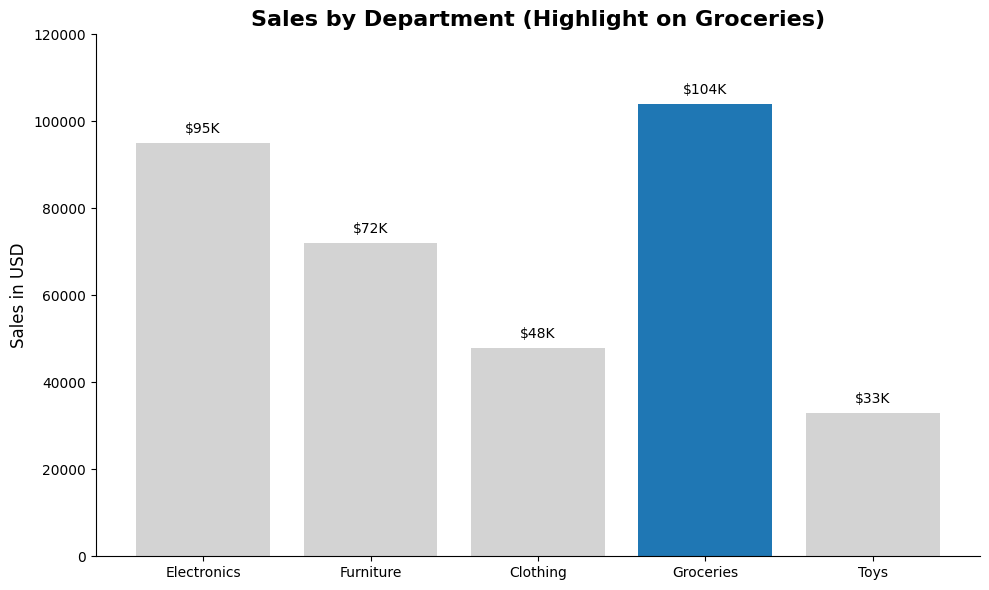

In [46]:
data = {
    'Department': ['Electronics', 'Furniture', 'Clothing', 'Groceries', 'Toys'],
    'Sales': [95000, 72000, 48000, 104000, 33000]
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#d3d3d3'] * len(df)
highlight_index = df[df['Department'] == 'Groceries'].index[0]
colors[highlight_index] = '#1f77b4' 

bars = ax.bar(df['Department'], df['Sales'], color=colors)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"${height/1000:.0f}K",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords="offset points",
                ha='center', va='bottom')


ax.set_title('Sales by Department (Highlight on Groceries)', fontsize=16, weight='bold')
ax.set_ylabel('Sales in USD', fontsize=12)
ax.set_ylim(0, 120000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()